In [1]:
import pandas as pd

df = pd.read_csv('CleanData.csv', encoding='utf-8')

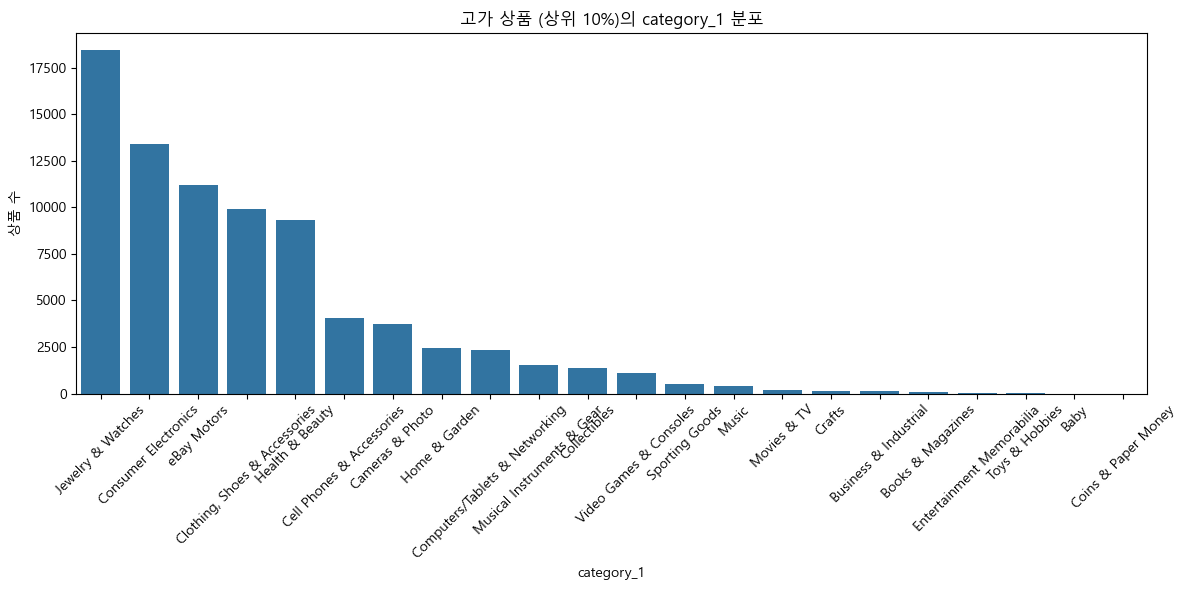

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 🔧 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 고가 기준 (상위 10%)
price_threshold = df['price'].quantile(0.9)

# 고가 상품 필터링
df_high_price = df[df['price'] >= price_threshold]

# 카테고리 분포 집계
top_categories = df_high_price['category_1'].value_counts().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title('고가 상품 (상위 10%)의 category_1 분포')
plt.xlabel('category_1')
plt.ylabel('상품 수')
plt.tight_layout()
plt.show()


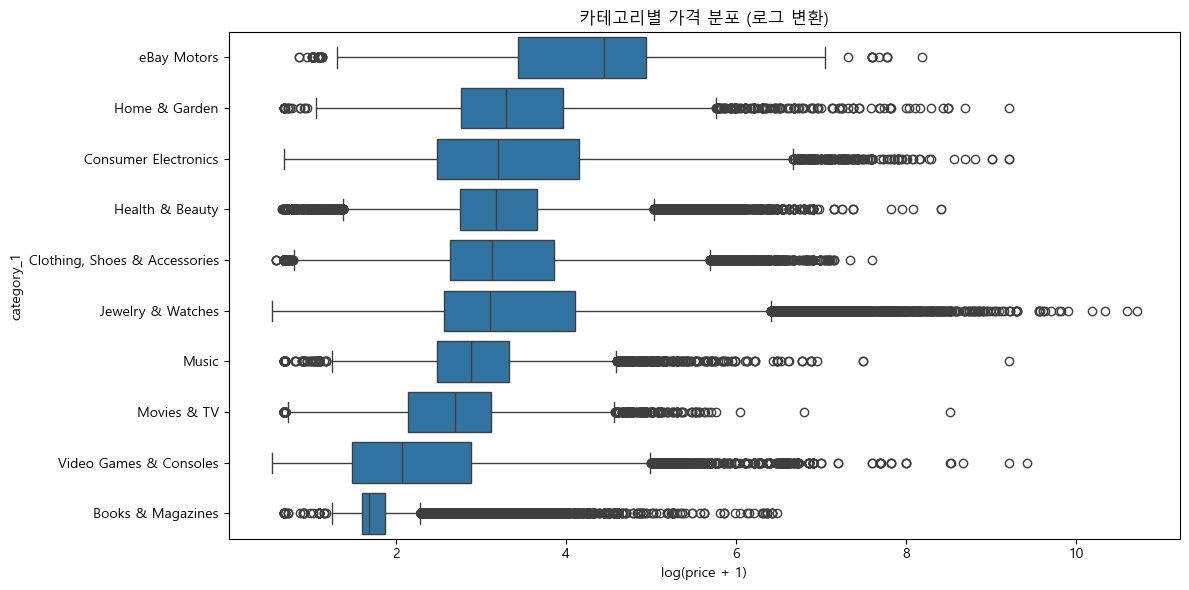

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 로그 변환된 가격 컬럼 추가
df['log_price'] = np.log1p(df['price'])

# 카테고리별 상품 수 기준 Top 10만 필터링
top_categories = df['category_1'].value_counts().head(10).index
df_top = df[df['category_1'].isin(top_categories)]

# median 기준 정렬
order = df_top.groupby('category_1')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='log_price', y='category_1', order=order)
plt.title('카테고리별 가격 분포 (로그 변환)')
plt.xlabel('log(price + 1)')
plt.ylabel('category_1')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('CleanData.csv', encoding='utf-8')

# 1. 상위 10% 가격 기준값 계산
price_threshold = df['price'].quantile(0.9)

# 2. 고가 상품 필터링
high_price_df = df[df['price'] >= price_threshold]

# 3. 카테고리별 상품 수 세기
category_counts = high_price_df['category_1'].value_counts().reset_index()
category_counts.columns = ['카테고리', '상품 수']

# 4. 전체 고가 상품 대비 비율 계산
total_high_price = high_price_df.shape[0]
category_counts['전체 고가 상품 대비 비율 (%)'] = round(category_counts['상품 수'] / total_high_price * 100, 2)

# 5. 상위 5개 카테고리 추출
top5 = category_counts.head(5)

# 결과 출력
print(top5)


                            카테고리   상품 수  전체 고가 상품 대비 비율 (%)
0              Jewelry & Watches  18440               22.96
1           Consumer Electronics  13419               16.71
2                    eBay Motors  11175               13.92
3  Clothing, Shoes & Accessories   9892               12.32
4                Health & Beauty   9300               11.58
